### Glaze Alarm

Alol csv minus Leads Film does not have humidity readings except for about 5 readings in 2022 at the very end. The readings themselves are obscure times of the day.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = "./Smart House 2023 datapack CC BY-NC/GlazeAlarm 2023/Leads Film.csv"
df = pd.read_csv(data, engine="python")


In [46]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      418 non-null    datetime64[ns]
 1   Serial Number  418 non-null    int64         
 2   Name           418 non-null    object        
 3   Mode           418 non-null    object        
 4   Alarm          418 non-null    object        
 5   rH             418 non-null    object        
 6   Temp           418 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 23.0+ KB


,Timestamp,Serial Number,Name,Mode,Alarm,rH,Temp
0,2023-05-15 09:49:00,1092,Leads Film,STATE,RESET,0,17.6
1,2023-05-14 17:47:00,1092,Leads Film,STATE,RESET,0.1,17.3
2,2023-05-14 07:05:00,1092,Leads Film,STATE,RESET,0,16.2
3,2023-05-14 01:44:00,1092,Leads Film,STATE,RESET,0,16.6
4,2023-05-13 20:24:00,1092,Leads Film,STATE,RESET,0,16.6


In [39]:
df.isnull().sum()

Timestamp        0
Serial Number    0
Name             0
Mode             0
Alarm            0
rH               0
Temp             0
dtype: int64

In [48]:
# Check for empty strings or non-numeric values
print(df[df['rH'] == ''].head())  # Rows with empty strings in 'rH'
print(df[df['Temp'] == ''].head())  # Rows with empty strings in 'Temp'

              Timestamp  Serial Number        Name      Mode  Alarm rH Temp
360 2022-11-29 10:06:00           1092  Leads Film  LEARNING  RESET        
361 2022-11-29 10:05:00           1092  Leads Film  LEARNING  RESET        
365 2022-11-29 10:03:00           1092  Leads Film  LEARNING  RESET        
406 2022-08-18 15:21:00           1092  Leads Film  LEARNING  RESET        
409 2022-05-04 08:56:00           1092  Leads Film  LEARNING  RESET        
              Timestamp  Serial Number        Name      Mode  Alarm rH Temp
360 2022-11-29 10:06:00           1092  Leads Film  LEARNING  RESET        
361 2022-11-29 10:05:00           1092  Leads Film  LEARNING  RESET        
365 2022-11-29 10:03:00           1092  Leads Film  LEARNING  RESET        
406 2022-08-18 15:21:00           1092  Leads Film  LEARNING  RESET        
409 2022-05-04 08:56:00           1092  Leads Film  LEARNING  RESET        


In [54]:
df['Timestamp'] = pd.to_datetime(df["Timestamp"])


# Replace empty strings with NaN
df['rH'] = df['rH'].replace('', np.nan)
df['Temp'] = df['Temp'].replace('', np.nan)

# Convert to float
df['rH'] = df['rH'].astype(float)
df['Temp'] = df['Temp'].astype(float)

# drop the missing values
df = df.dropna(subset=['rH', 'Temp'])
print(df[['rH', 'Temp']].isnull().sum())

rH      0
Temp    0
dtype: int64


Dropped the missing values in RH and Temp due to being only 6 values

In [55]:
df.head()

,Timestamp,Serial Number,Name,Mode,Alarm,rH,Temp
0,2023-05-15 09:49:00,1092,Leads Film,STATE,RESET,0.0,17.6
1,2023-05-14 17:47:00,1092,Leads Film,STATE,RESET,0.1,17.3
2,2023-05-14 07:05:00,1092,Leads Film,STATE,RESET,0.0,16.2
3,2023-05-14 01:44:00,1092,Leads Film,STATE,RESET,0.0,16.6
4,2023-05-13 20:24:00,1092,Leads Film,STATE,RESET,0.0,16.6


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 416
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      412 non-null    datetime64[ns]
 1   Serial Number  412 non-null    int64         
 2   Name           412 non-null    object        
 3   Mode           412 non-null    object        
 4   Alarm          412 non-null    object        
 5   rH             412 non-null    float64       
 6   Temp           412 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 25.8+ KB


In [57]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

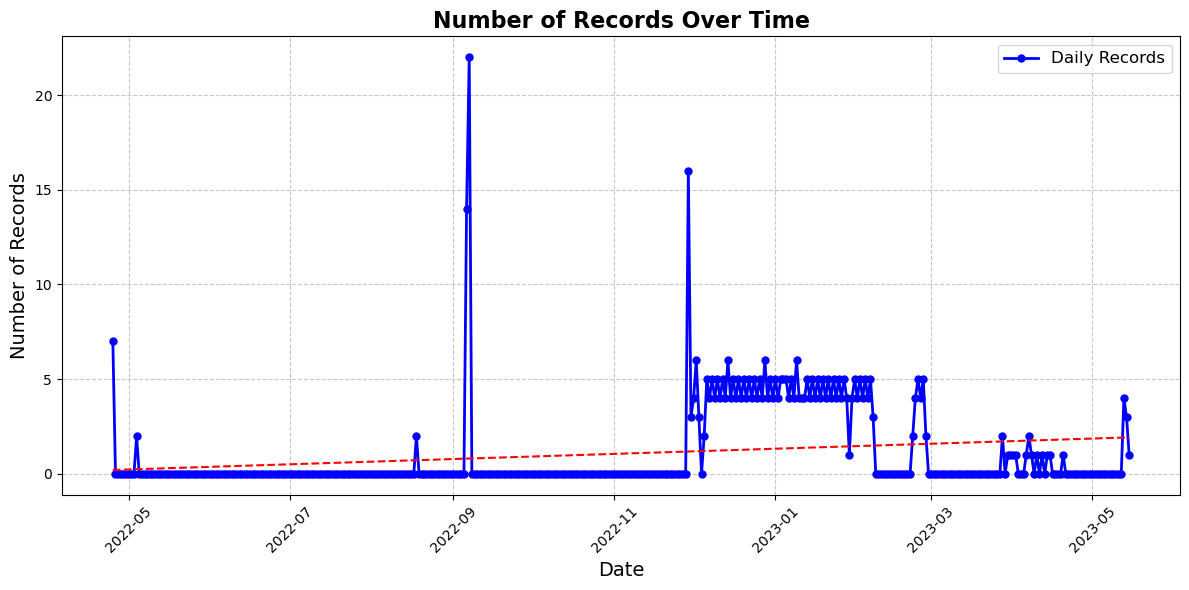

In [63]:
# Set Timestamp as the index and resample by day
daily_counts = df.set_index('Timestamp').resample('D').size()

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_counts.index, daily_counts.values, color='blue', linestyle='-', linewidth=2, marker='o', markersize=5, label='Daily Records')

# Add titles and labels
plt.title('Number of Records Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a trendline (optional)
z = np.polyfit(range(len(daily_counts)), daily_counts, 1)  # Linear trendline
p = np.poly1d(z)
plt.plot(daily_counts.index, p(range(len(daily_counts))), color='red', linestyle='--', label='Trendline')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [74]:
# Filter data for November 2022 to March 2023
filtered_data = df[
    (df['Timestamp'] >= '2022-11-01') & (df['Timestamp'] <= '2023-03-31')
]
# Group by day and count records
daily_counts = filtered_data.resample('D', on='Timestamp').size().reset_index(name='Records')
# Rename the columns for clarity
daily_counts.columns = ['Date', 'Records']

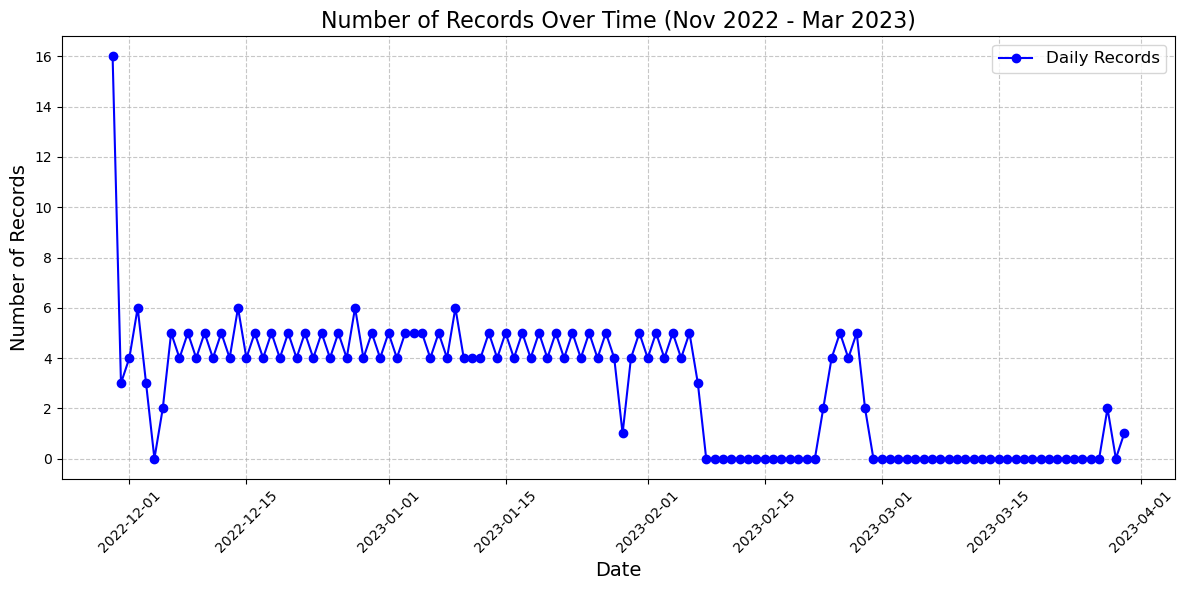

In [75]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['Date'], daily_counts['Records'], marker='o', linestyle='-', color='blue', label='Daily Records')

# Add titles and labels
plt.title('Number of Records Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

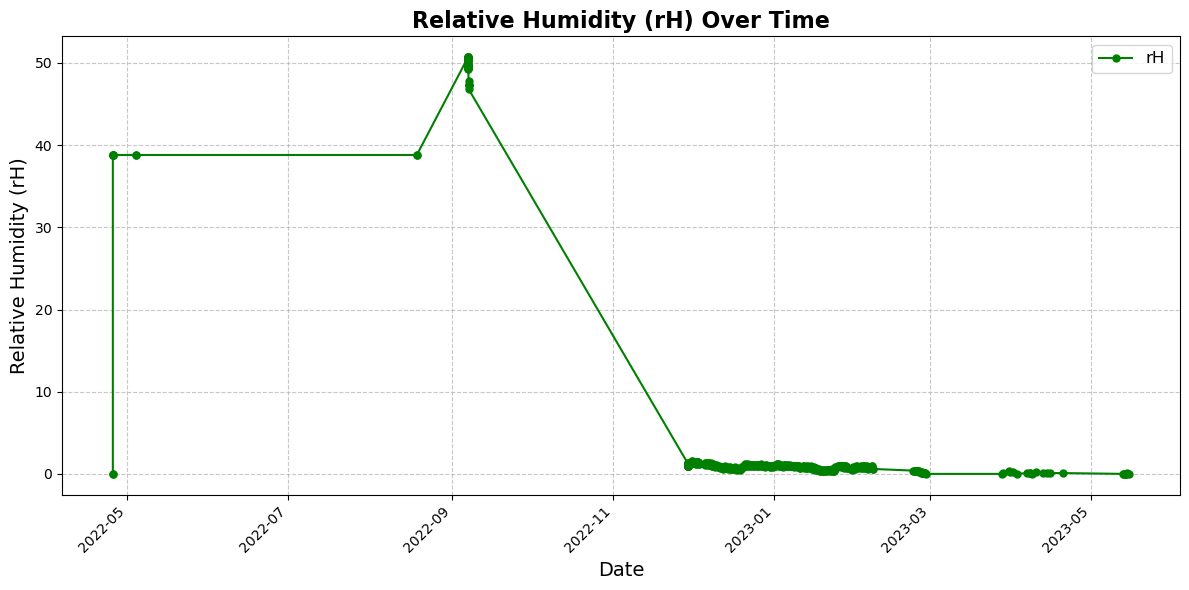

In [76]:
# Set Timestamp as the index and plot rH
df.set_index('Timestamp')['rH'].plot(figsize=(12, 6), color='green', linestyle='-', marker='o', markersize=5, label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
# Group by day and calculate average rH
daily_rH = filtered_data.resample('D', on='Timestamp')['rH'].mean().reset_index()

# Rename the columns for clarity
daily_rH.columns = ['Date', 'Avg rH']

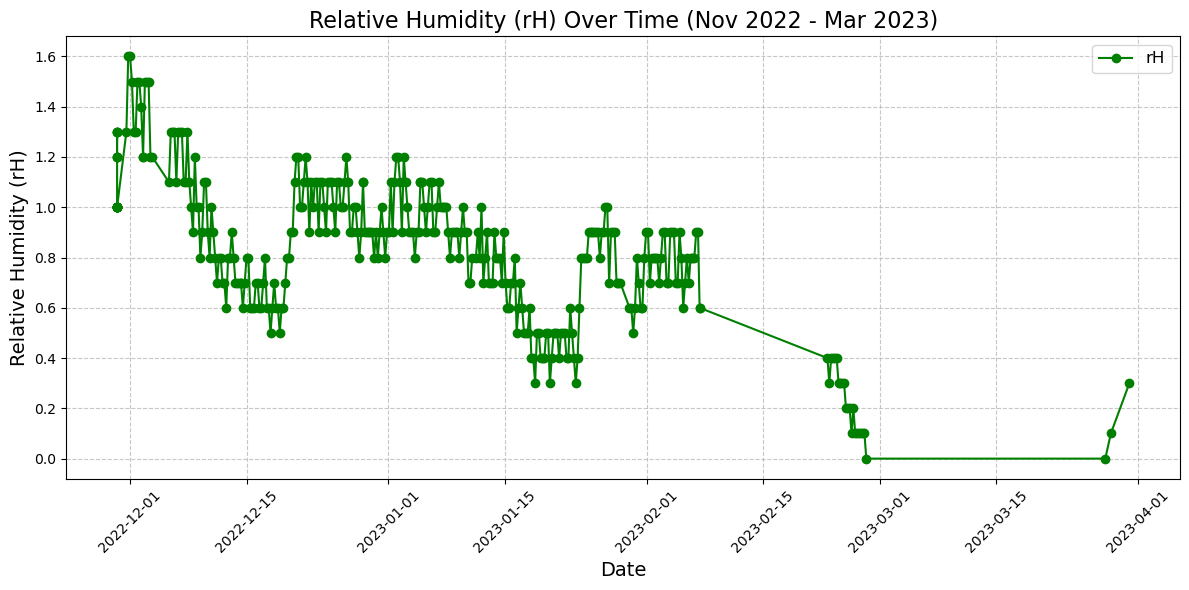

In [78]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], filtered_data['rH'], marker='o', linestyle='-', color='green', label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

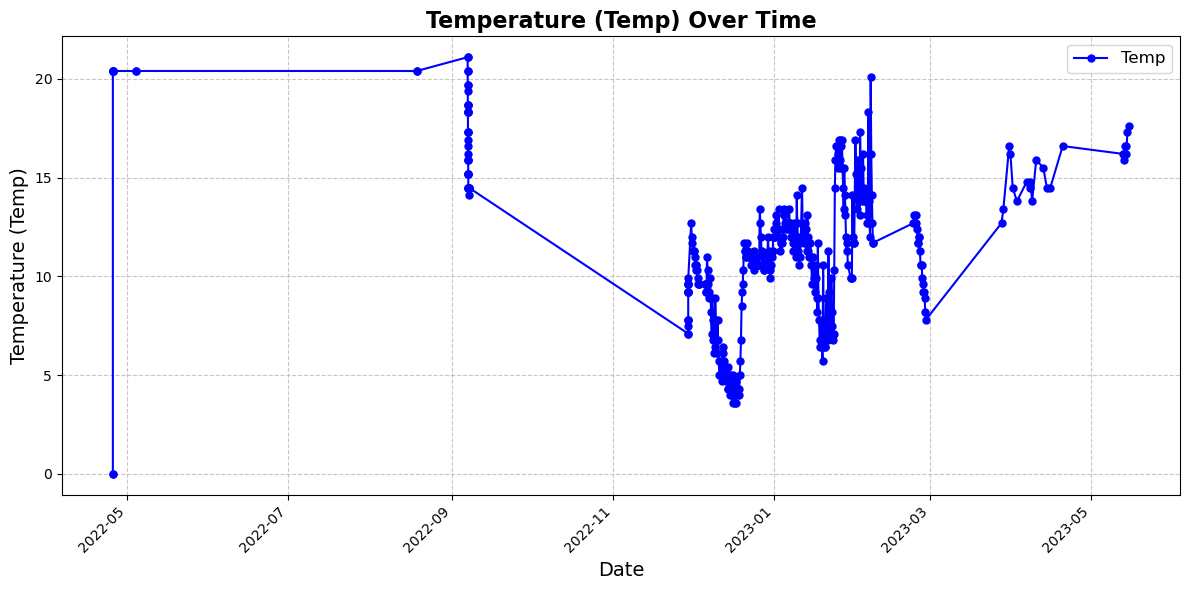

In [80]:
import matplotlib.pyplot as plt

# Set Timestamp as the index and plot Temp
df.set_index('Timestamp')['Temp'].plot(figsize=(12, 6), color='blue', linestyle='-', marker='o', markersize=5, label='Temp')

# Add titles and labels
plt.title('Temperature (Temp) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Temp)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

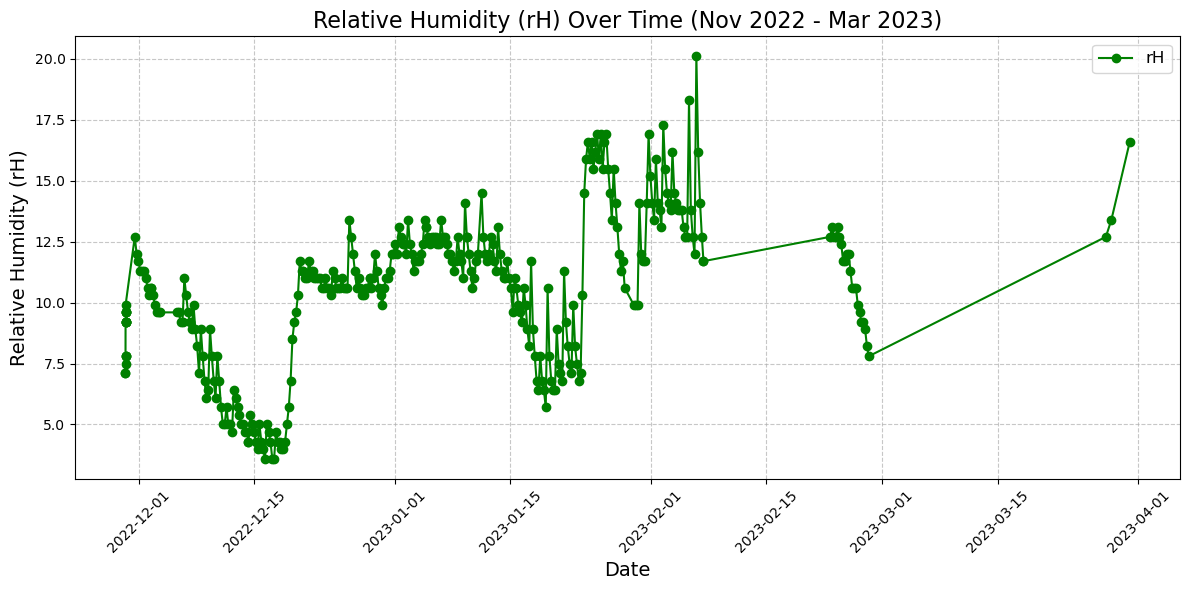

In [81]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], filtered_data['Temp'], marker='o', linestyle='-', color='green', label='rH')

# Add titles and labels
plt.title('Relative Humidity (rH) Over Time (Nov 2022 - Mar 2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Humidity (rH)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
# Count the frequency of each Alarm state
alarm_counts = df['Alarm'].value_counts()

# Print the counts
print(alarm_counts)

Alarm
RESET       354
ALARM        41
PRE-WARN     17
Name: count, dtype: int64


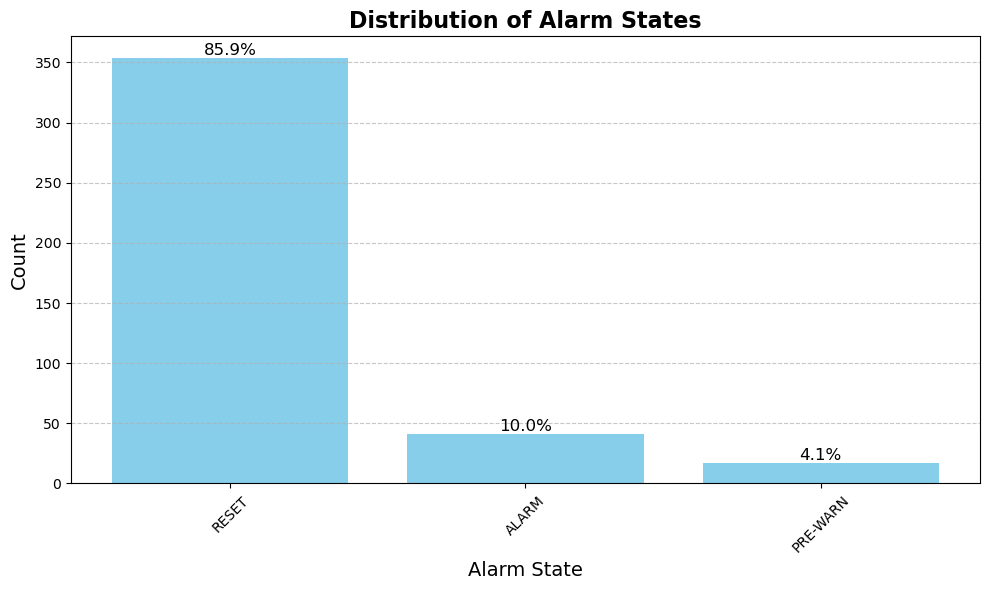

In [84]:
# Calculate percentages
total = alarm_counts.sum()
percentages = (alarm_counts / total) * 100

# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(alarm_counts.index, alarm_counts.values, color='skyblue')

# Add percentages on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Distribution of Alarm States', fontsize=16, fontweight='bold')
plt.xlabel('Alarm State', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Invisible System